In [55]:
import numpy as np
import sdeint
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import pickle
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

In [62]:
#Define the discrete ADE, with the stability condition

def Solve_ADE(C_ini,Dx,dt,v,D):
    u=C_ini
    assert(v*dt/Dx <1)
    
    coef1=(v*dt)/(Dx)
    coef2=D*dt/(Dx**2)
    
    for j in range(Nt):
        for i in range(Nx+1):
    
            if i>0:
                u[i,j+1] += coef1*u[i-1,j]
                u[i,j+1] += coef2*u[i-1,j]
            
            if i<Nx:
                u[i,j+1] -= coef1*u[i,j]
                u[i,j+1] += coef2*u[i+1,j]
            
            u[i,j+1] += (1-2*coef2)*u[i,j]
            
    return u
    

In [75]:
#Define the domain

L=20
v=1
D=0.1
C_0=1
Nx=200
dt=0.01
T=10
Nt=int(T/dt)
Dx=L/(Nx+1)

C=np.zeros((Nx+1,Nt+1),float)
pos=np.linspace(-10,10,Nx+1)


In [76]:
#initialize C
for i in range(len(C)):
    if abs(pos[i])<1:
        C[i,0]=C_0


In [77]:
#Solve the ADE

C_sol=Solve_ADE(C,Dx,dt,v,D)

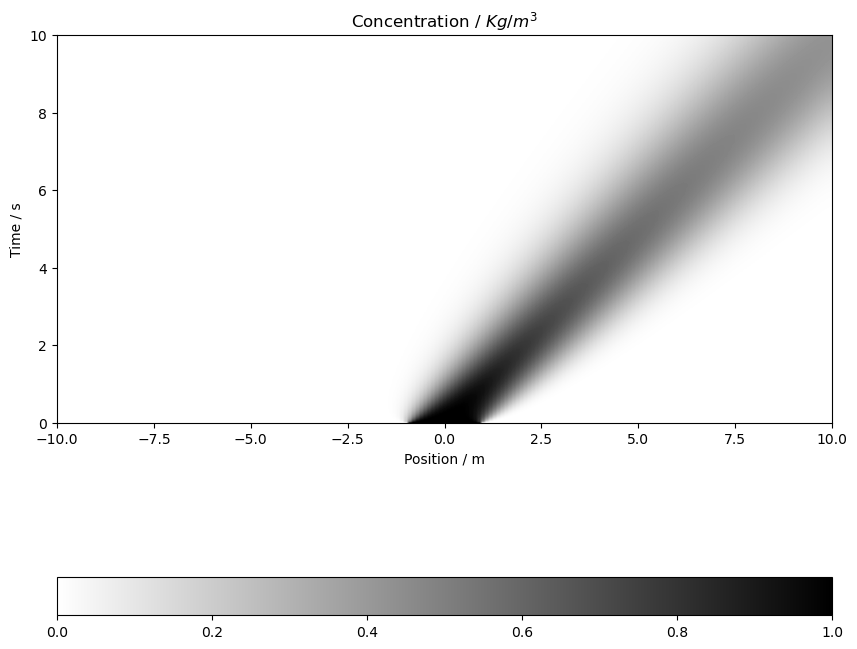

In [78]:
#Plot the results

C_img=C_sol.T[::-1,:]

extentimg = [-L/2, L/2, 0, T] 

fig, ax = plt.subplots(figsize=(10, 10))


img = ax.imshow(C_img, extent=extentimg, cmap='gray_r')



cbar = fig.colorbar(img, orientation='horizontal', pad=0.2)

ax.set_title('Concentration / $Kg/m^3$')
ax.set_xlabel('Position / m')
ax.set_ylabel('Time / s')
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/ADE.png",bbox_inches="tight")

plt.show()


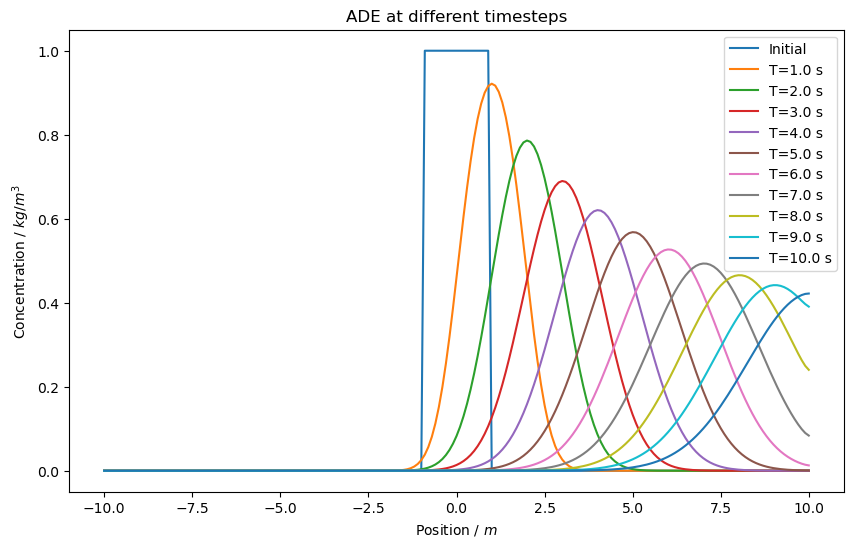

In [102]:
plt.figure(figsize=(10, 6))

plt.plot(pos,C_img[-1,:], label='Initial')


for i in range(1,Nt+1):
    
    if i%100==0:
        plt.plot(pos,C_img[Nt-i,:],label=f"T={i * dt} s")
plt.legend()  
plt.title('ADE at different timesteps')
plt.ylabel('Concentration / $kg/m^3$')
plt.xlabel('Position / $m$')

plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/ADE2.png",bbox_inches="tight")